## Task 1 : Prepare a complete data analysis report on the given data.

## Data Analysis report

### 1. *Introduction*

This report presents a comprehensive data analysis of a blood donation dataset aimed at predicting whether a donor will donate blood in March 2007. The dataset includes key information such as donation frequency, recency, and volume donated.

#Yes (1): (Donated in March 2007)

#No (0): (Did not donate)

### 2. *Dataset Overview*

- Data Sources 
Dataset Name: Warm-Up Predict Blood Donations – Training Data , File Format: .csv and .xlsx , Rows: 748 , Columns: 5
- Features 
'Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'


### 3. *Data Loading & Overview*

Loading the data from values.csv and lables.csv
check missing values across any feature and data type.
check any inconsistencies in the data.

### 4. *Exploratroy Data Analysis* 


### 4.1 Data Summary 
### Basic statisic
1. Summary f numerical variables : Mean ,standard deviation,min,max,quartiles.
2. distribution of variables

### 4.2 Visual Analysis 
1. Univariate Analysis
- Plot distributions for numerical features(Histogram)
2. Bivariate Analysis
- Correlation heatmap
- Boxplots by target
3. Outlier detection
- Boxplot for outlier check
4. Pairwise Relationships
- Pairplot to see interaction between features
5. Missing data analysis
- Identify any missing value in dataset.
- Visualize missing data patterns (eg.Heatmap, matrix map)

### 5. *Data prepocessing*

1. Check for missing values.
- Check missing values
- visualize the missing values
2. Outlier detection & Treatment (IQR Method)
- Define a function to detect outliers using IQR
- Apply outlier removal
3. Feature Engineering
- Derive average donation frequency (example feature)
- Check new feature
4. Scaling Features
- Features to scale (exclude target)
5. Train-Test Split
- Split the dataset

### 6. *Model selection & Evalution*


1. Import Models and Metrics
2. Train and Evaluate Multiple Models
- Define models
- Dictionary to store results
- Train and evaluate
- Convert results to DataFrame
2. Plot Confusion Matrix for Best Model
- Pick best model (based on F1 Score)
- Predictions
- Confusion matrix
3. Classification Report
4. Cross-Validation

### 7. *Results & Insights* 

1. Remove redundancy: Total Volume Donated is derived from Number of Donations → Can drop this column.

2. Imbalanced target: Consider SMOTE, class weights, or other resampling techniques during modeling.

3. Feature Engineering Ideas:

- Frequency = Number of Donations / Months since First Donation

- Recency = Months since Last Donation

### 8. *Conclusions*

- This dataset is well-prepared for predictive modeling with some basic preprocessing.
The key challenge lies in handling class imbalance. With appropriate feature engineering and model selection,
we can develop a model to reliably predict future donations.

## Task 2 :Create a predictive model which will help to repeat blood donations amongst donors based on a limited number of attributes

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Load the data
data=pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')

In [3]:
data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


### ***Basic checks***

In [4]:
# no of rows and columns 
data.shape

(576, 6)

In [5]:
# first 5 rows
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [6]:
# last 5 rows
data.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [7]:
# all colunms
data.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [8]:
# datatype of each columns
data.dtypes

Unnamed: 0                     int64
Months since Last Donation     int64
Number of Donations            int64
Total Volume Donated (c.c.)    int64
Months since First Donation    int64
Made Donation in March 2007    int64
dtype: object

In [9]:
# memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [10]:
# unique values in Made Donation in March 2007
data['Made Donation in March 2007'].unique()

array([1, 0], dtype=int64)

In [11]:
# find count
data['Made Donation in March 2007'].value_counts()

Made Donation in March 2007
0    438
1    138
Name: count, dtype: int64

In [12]:
data.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [13]:
# check for missing values
data.isnull().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

### ***EDA (Exploratory Data Analysis)***

**Step 1 : univariate analysis**
- histplot is used to check distribution of the data
- countplot is used to check whether data is balanced or not

In [14]:
# Check whether data is balanced or not
# means equal no. of records related to blood donated in march 2007 and did not donate 
plt.figure(figsize=(6,2))
sns.countplot(x=data['Made Donation in March 2007'])

<Axes: xlabel='Made Donation in March 2007', ylabel='count'>

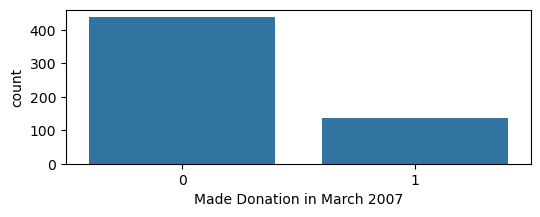

In [15]:
plt.show()

In [16]:
data['Made Donation in March 2007'].value_counts()

Made Donation in March 2007
0    438
1    138
Name: count, dtype: int64

***Insights***
 clearly data is imbalanced since we have more records related to not donated(0) and less records related to Donated in March 2007(1) 



In [17]:
data.head(1)

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1


In [18]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

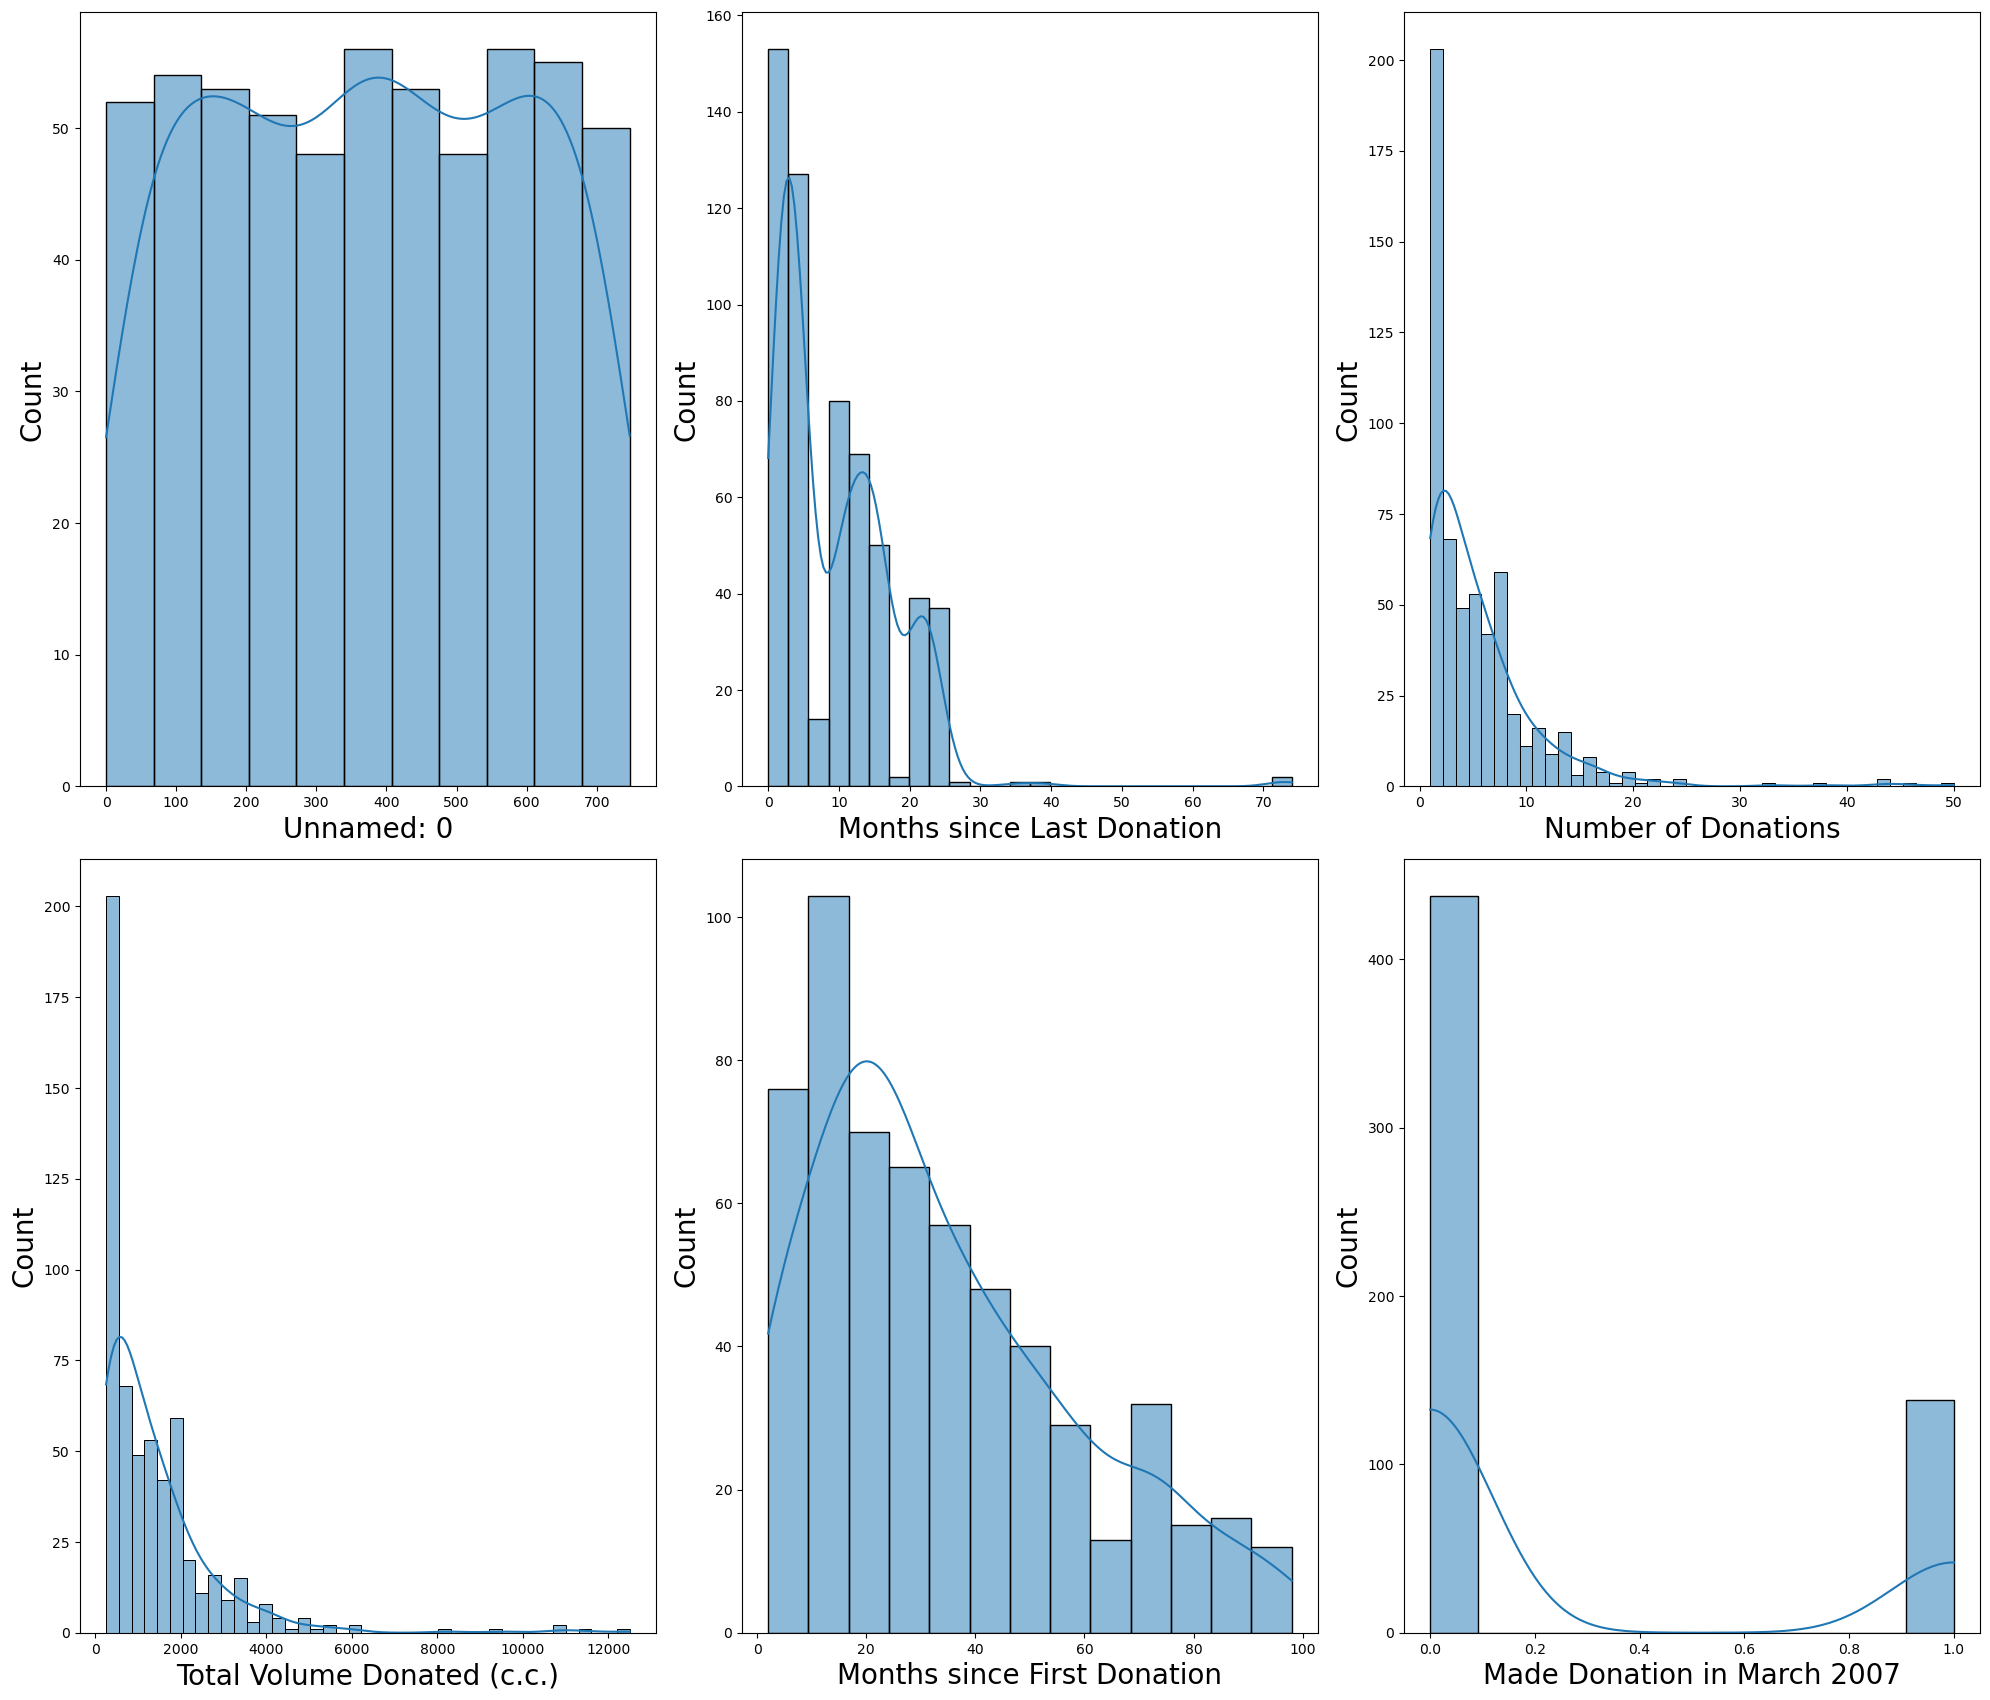

In [19]:
plt.show()

***Insights***
the dataset appears imbalanced, especially in the target variable (Made Donation in March 2007).most donars are recent and in frequent.
the distribution of unnamed:0 (uniform),months since last donation & number of donations (highly right skewed),total volume donated(right skewed),
months since first donation (right skewed with tail).

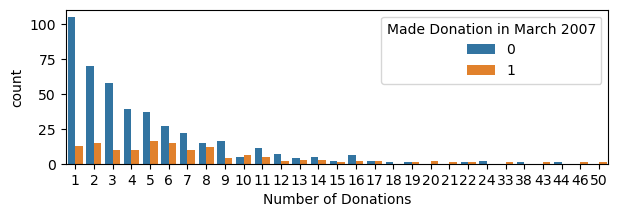

In [20]:
##Bivariate Analysis refers to plots between input variables and target variable.
plt.figure(figsize=(7,2))
sns.countplot(x='Number of Donations',data=data,hue='Made Donation in March 2007')
plt.show()

In [21]:
## Aanlyzing the relationship between Total Volume Donated(c.c.)  and Made Donations in March 2007
plt.figure(figsize=(6,2))
sns.histplot(x='Total Volume Donated (c.c.)',hue='Made Donation in March 2007',data=data)

<Axes: xlabel='Total Volume Donated (c.c.)', ylabel='Count'>

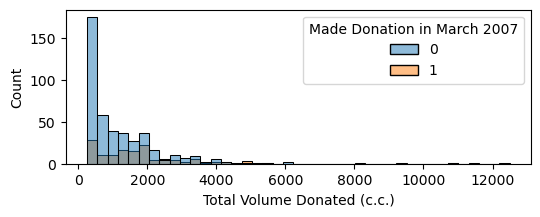

In [22]:
plt.show()

In [23]:
data['Made Donation in March 2007'].value_counts()

Made Donation in March 2007
0    438
1    138
Name: count, dtype: int64

***Insights***
most donars who made a donation in march 2007 donated moderate volumes(between 20-40 c.c.)
high donation volumes are rare, mostly associated with who did not donate in march 2007.
the distribution is right skewed.

In [24]:
## Analyze relationship between Months since Last Donation and Made Donation in March 2007
plt.figure(figsize=(6,2))
sns.histplot(x='Months since Last Donation',hue='Made Donation in March 2007',data=data)

<Axes: xlabel='Months since Last Donation', ylabel='Count'>

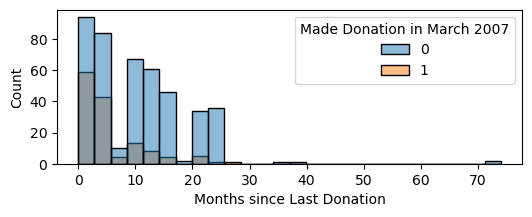

In [25]:
plt.show()

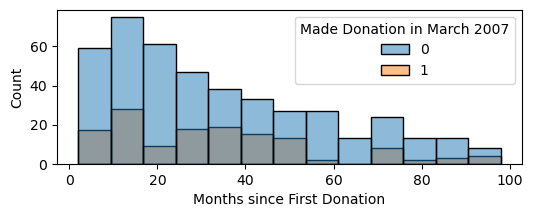

In [26]:
## Analyze relationship between Months since First Donation and Made Donation in March 2007
plt.figure(figsize=(6,2))
sns.histplot(x='Months since First Donation',hue='Made Donation in March 2007',data=data)
plt.show()

### ***Multivariate***

In [27]:
sns.pairplot(data,hue='Made Donation in March 2007')

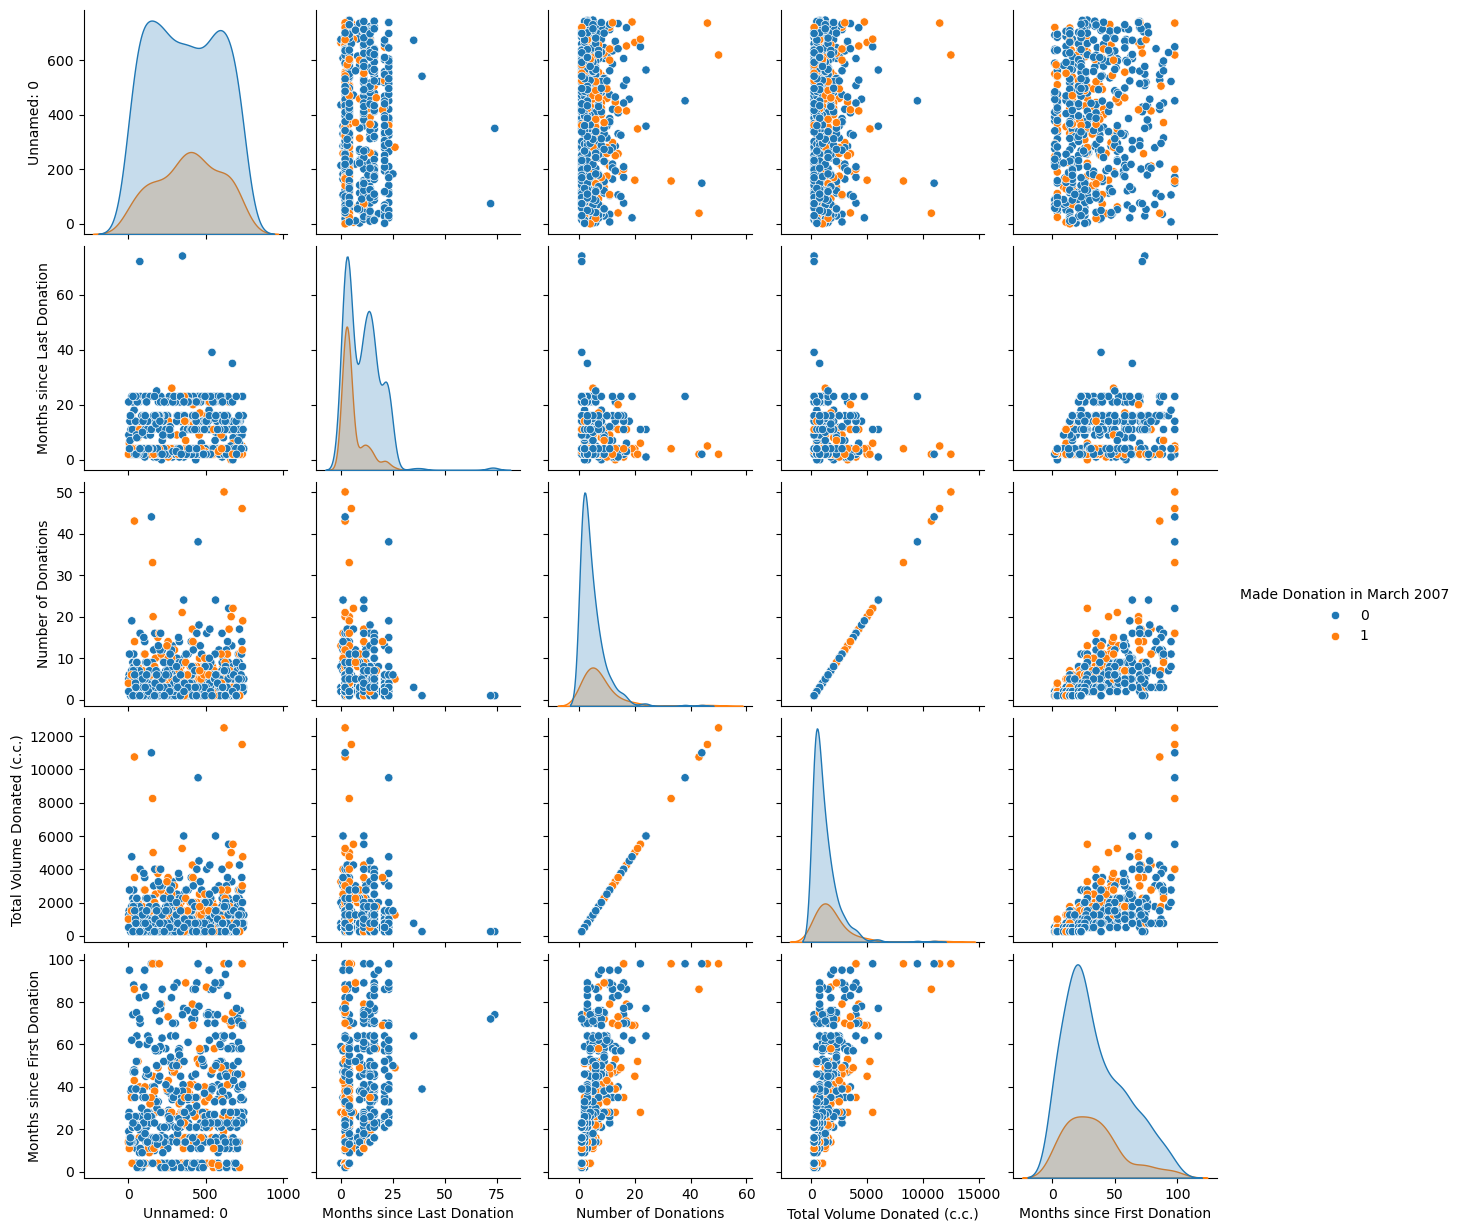

In [28]:
plt.show()

### ***Data Perpocessing***

In [29]:
#handling missing values
data.isnull().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

In [30]:
data.duplicated().sum()

0

In [31]:
data.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [32]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data.drop('Made Donation in March 2007',axis=1):
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

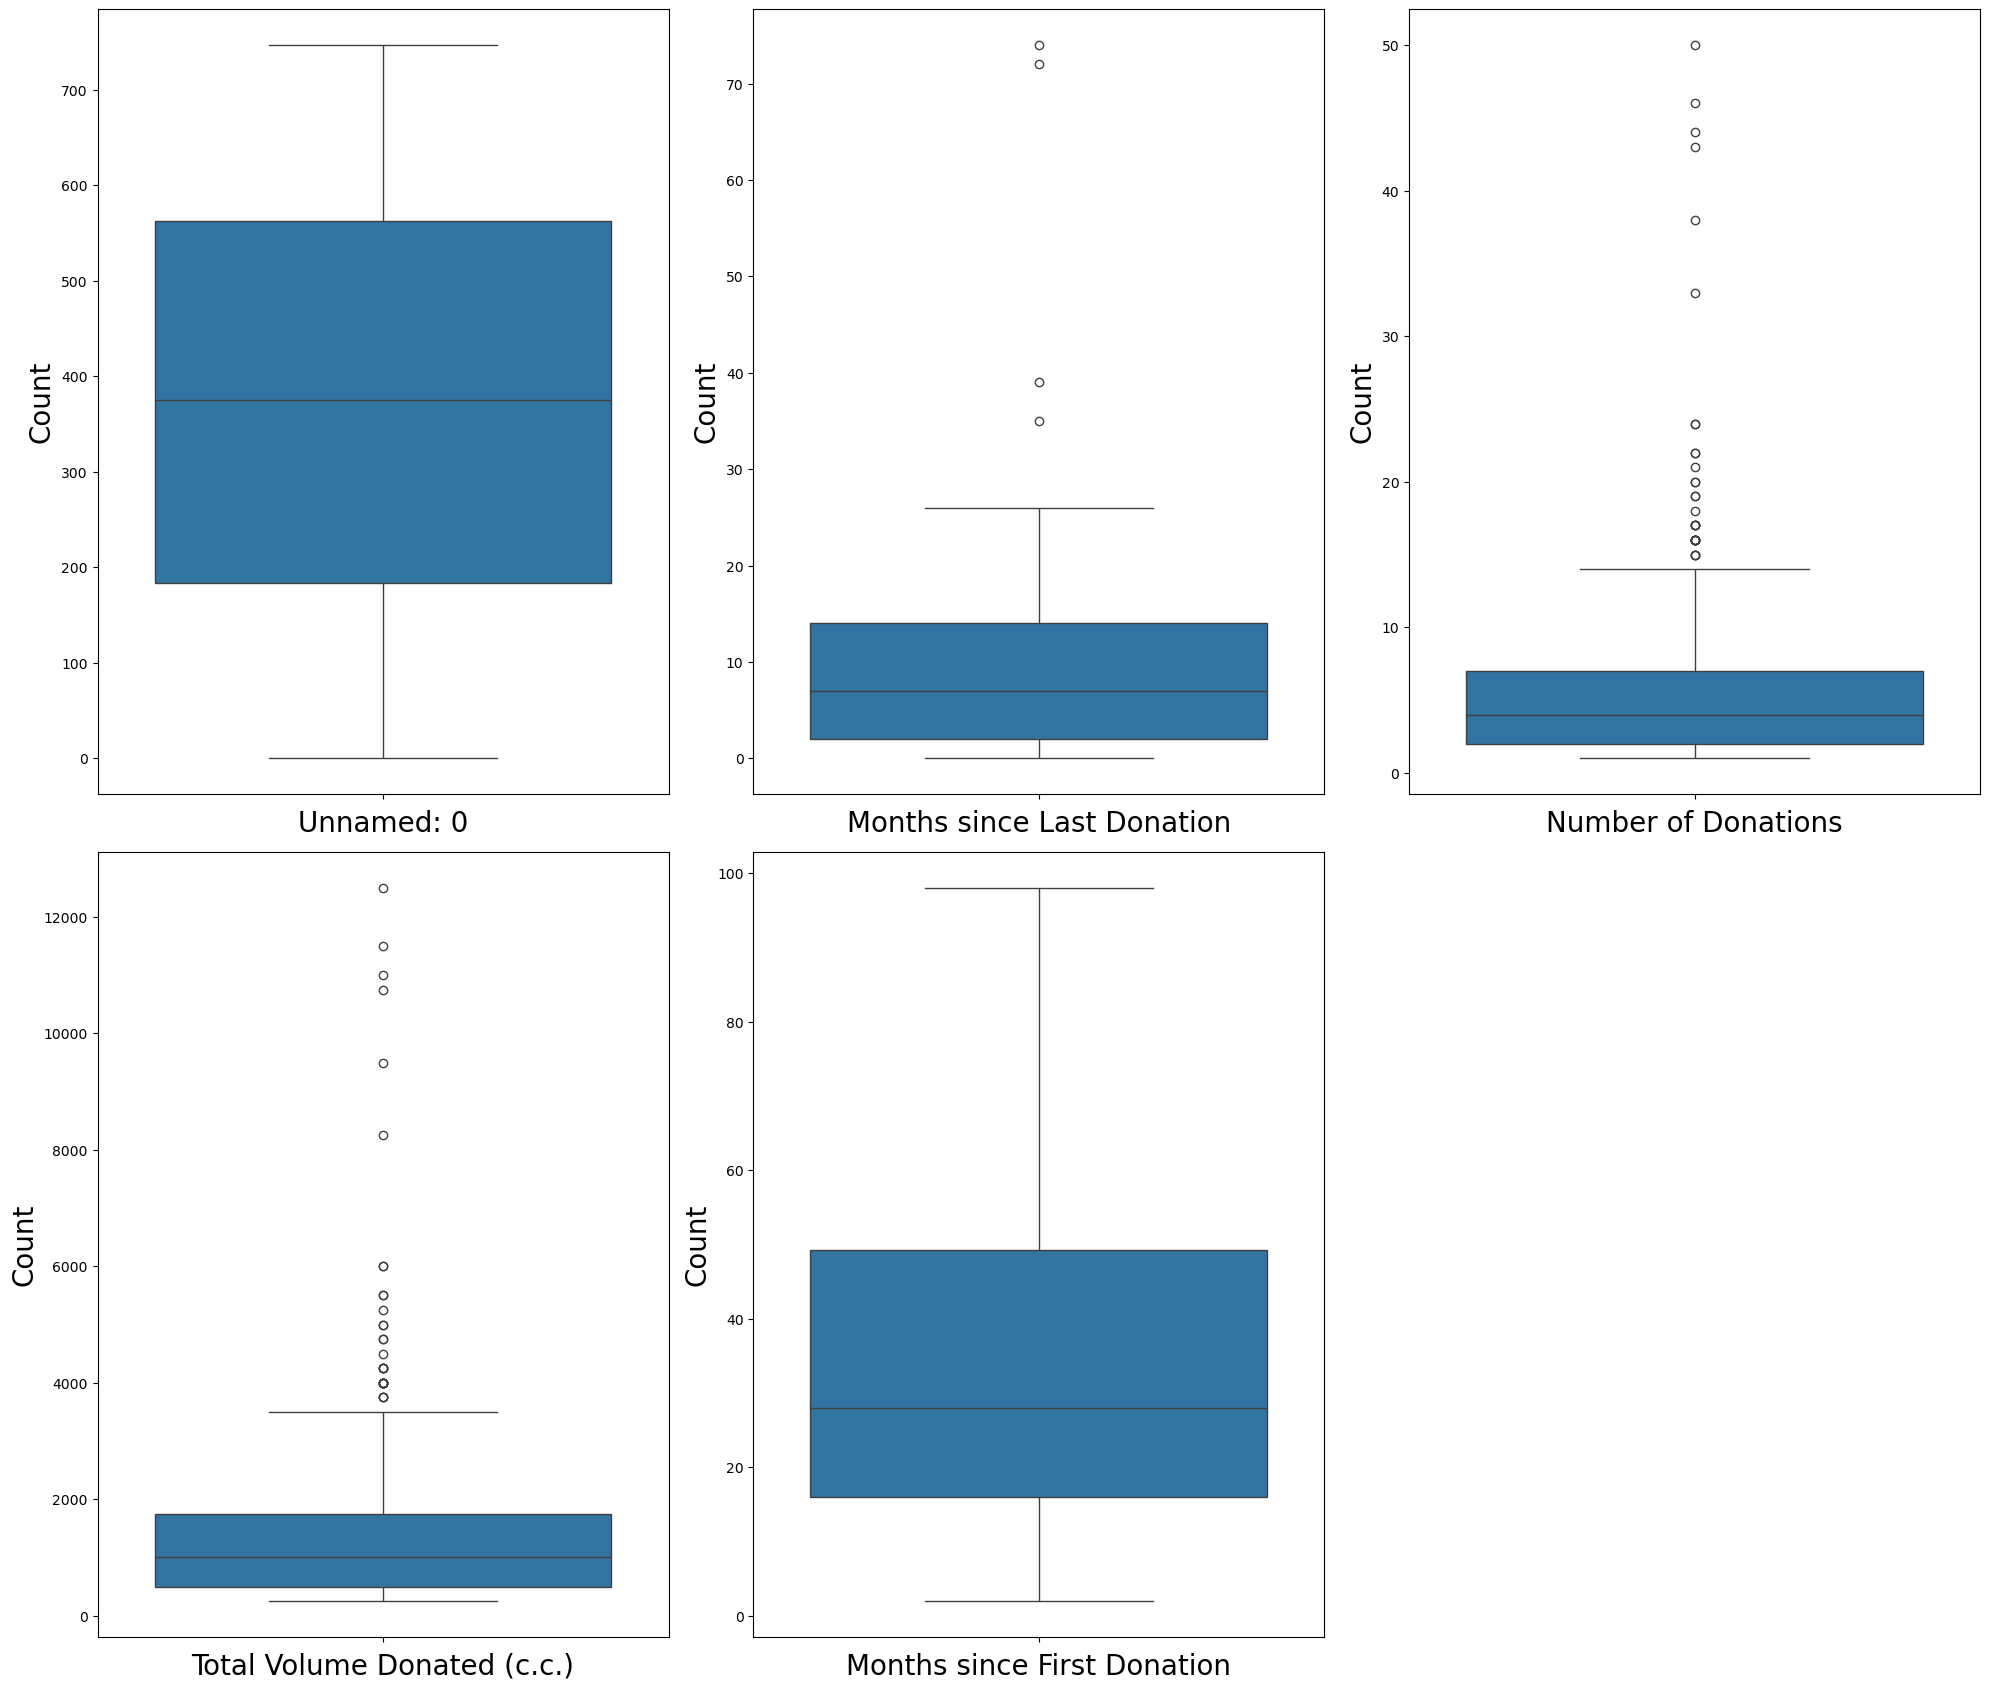

In [33]:
plt.show()

In [34]:
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [35]:
features = data.drop(columns=["Unnamed: 0", "Made Donation in March 2007"])

In [36]:
def detect_outliers_iqr(data):
    outlier_indices = {}
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outlier_indices[col] = outliers.tolist()
    return outlier_indices

In [37]:
outliers_iqr = detect_outliers_iqr(features)

In [38]:
for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers")

Months since Last Donation: 4 outliers
Number of Donations: 31 outliers
Total Volume Donated (c.c.): 31 outliers
Months since First Donation: 0 outliers


In [39]:
all_outlier_indices = set()
for indices in outliers_iqr.values():
    all_outlier_indices.update(indices)
data_cleaned = data.drop(index=all_outlier_indices).reset_index(drop=True)

In [40]:
print("\nOriginal shape:", data.shape)
print("Cleaned shape:", data_cleaned.shape)


Original shape: (576, 6)
Cleaned shape: (541, 6)


In [41]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=['Unnamed: 0','Made Donation in March 2007']
data1=sc.fit_transform(data.drop(dl,axis=1))

In [42]:
data1

array([[0.02702703, 1.        , 1.        , 1.        ],
       [0.        , 0.24489796, 0.24489796, 0.27083333],
       [0.01351351, 0.30612245, 0.30612245, 0.34375   ],
       ...,
       [0.28378378, 0.02040816, 0.02040816, 0.52083333],
       [0.52702703, 0.        , 0.        , 0.38541667],
       [0.97297297, 0.        , 0.        , 0.72916667]])

In [43]:
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [44]:
type(data1)

numpy.ndarray

In [45]:
data1.shape

(576, 4)

In [46]:
data2=pd.DataFrame(data1,columns=['Months since Last Donation','Number of Donations', 'Total Volume Donated (c.c.)',
'Months since First Donation'])

In [47]:
data2

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,0.027027,1.000000,1.000000,1.000000
1,0.000000,0.244898,0.244898,0.270833
2,0.013514,0.306122,0.306122,0.343750
3,0.027027,0.387755,0.387755,0.447917
4,0.013514,0.469388,0.469388,0.781250
...,...,...,...,...
571,0.310811,0.000000,0.000000,0.218750
572,0.216216,0.040816,0.040816,0.875000
573,0.283784,0.020408,0.020408,0.520833
574,0.527027,0.000000,0.000000,0.385417


In [48]:
con_data=data[['Unnamed: 0','Made Donation in March 2007']]

In [49]:
con_data

,Unnamed: 0,Made Donation in March 2007
0,619,1
1,664,1
2,441,1
3,160,1
4,358,0
...,...,...
571,698,0
572,433,0
573,360,0
574,541,0


In [50]:
data.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [51]:
final_df=pd.concat([data2,con_data],axis=1)

In [52]:
final_df

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Unnamed: 0,Made Donation in March 2007
0,0.027027,1.000000,1.000000,1.000000,619,1
1,0.000000,0.244898,0.244898,0.270833,664,1
2,0.013514,0.306122,0.306122,0.343750,441,1
3,0.027027,0.387755,0.387755,0.447917,160,1
4,0.013514,0.469388,0.469388,0.781250,358,0
...,...,...,...,...,...,...
571,0.310811,0.000000,0.000000,0.218750,698,0
572,0.216216,0.040816,0.040816,0.875000,433,0
573,0.283784,0.020408,0.020408,0.520833,360,0
574,0.527027,0.000000,0.000000,0.385417,541,0


### ***Feature selection***

In [53]:
sns.heatmap(data2.corr(),annot=True)

<Axes: >

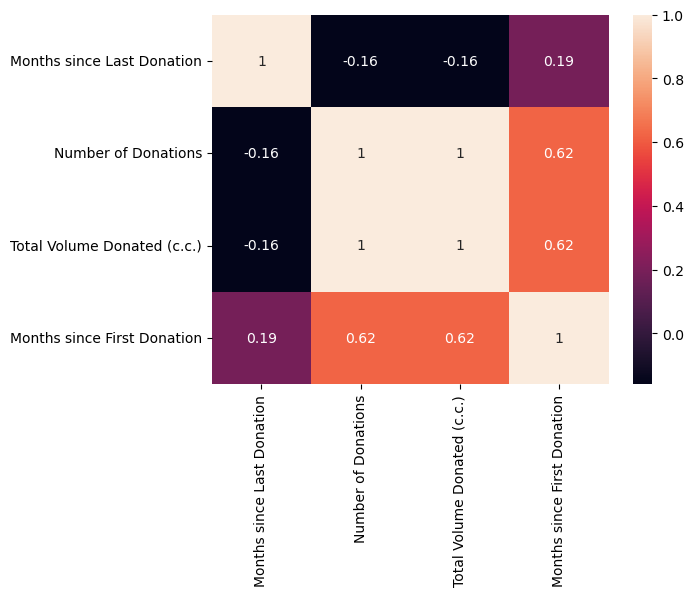

In [54]:
plt.show()

### ***Model Creation***

In [55]:
final_df.head(1)

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Unnamed: 0,Made Donation in March 2007
0,0.027027,1.0,1.0,1.0,619,1


In [56]:
# Creating independent and dependent variable.
X=final_df.iloc[:,:-1]
y=final_df['Made Donation in March 2007']

In [57]:
X

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Unnamed: 0
0,0.027027,1.000000,1.000000,1.000000,619
1,0.000000,0.244898,0.244898,0.270833,664
2,0.013514,0.306122,0.306122,0.343750,441
3,0.027027,0.387755,0.387755,0.447917,160
4,0.013514,0.469388,0.469388,0.781250,358
...,...,...,...,...,...
571,0.310811,0.000000,0.000000,0.218750,698
572,0.216216,0.040816,0.040816,0.875000,433
573,0.283784,0.020408,0.020408,0.520833,360
574,0.527027,0.000000,0.000000,0.385417,541


In [58]:
y

0      1
1      1
2      1
3      1
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: Made Donation in March 2007, Length: 576, dtype: int64

In [59]:
# creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=45)

In [60]:
y_test

524    0
159    0
133    0
535    0
212    0
      ..
208    1
388    0
294    0
146    0
179    0
Name: Made Donation in March 2007, Length: 116, dtype: int64

In [61]:
X_test

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Unnamed: 0
524,0.148649,0.122449,0.122449,0.760417,430
159,0.054054,0.102041,0.102041,0.520833,596
133,0.027027,0.000000,0.000000,0.000000,587
535,0.189189,0.000000,0.000000,0.125000,627
212,0.175676,0.061224,0.061224,0.197917,702
...,...,...,...,...,...
208,0.054054,0.061224,0.061224,0.427083,38
388,0.027027,0.877551,0.877551,1.000000,149
294,0.189189,0.122449,0.122449,0.729167,428
146,0.135135,0.061224,0.061224,0.145833,565


In [62]:
X_train.shape

(460, 5)

In [63]:
y_train.shape

(460,)

In [64]:
# Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [65]:
# Predictions
y_pred=clf.predict(X_test)

In [66]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0], dtype=int64)

In [67]:
y_test

524    0
159    0
133    0
535    0
212    0
      ..
208    1
388    0
294    0
146    0
179    0
Name: Made Donation in March 2007, Length: 116, dtype: int64

In [68]:
y_pred_prob=clf.predict_proba(X_test)

In [69]:
y_pred_prob

array([[0.82591389, 0.17408611],
       [0.7351103 , 0.2648897 ],
       [0.69346078, 0.30653922],
       [0.7882311 , 0.2117689 ],
       [0.74147977, 0.25852023],
       [0.7734108 , 0.2265892 ],
       [0.71776817, 0.28223183],
       [0.83960097, 0.16039903],
       [0.68446004, 0.31553996],
       [0.72892454, 0.27107546],
       [0.7522498 , 0.2477502 ],
       [0.69057456, 0.30942544],
       [0.63538469, 0.36461531],
       [0.71694726, 0.28305274],
       [0.68415025, 0.31584975],
       [0.6706094 , 0.3293906 ],
       [0.90091296, 0.09908704],
       [0.76605152, 0.23394848],
       [0.74724816, 0.25275184],
       [0.8837303 , 0.1162697 ],
       [0.75739584, 0.24260416],
       [0.79803237, 0.20196763],
       [0.7437753 , 0.2562247 ],
       [0.75925696, 0.24074304],
       [0.79966728, 0.20033272],
       [0.77882268, 0.22117732],
       [0.8431003 , 0.1568997 ],
       [0.76557093, 0.23442907],
       [0.8225124 , 0.1774876 ],
       [0.73409294, 0.26590706],
       [0.

### ***Evaluation of Model***

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [71]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[86  2]
 [27  1]]


In [72]:
acc=accuracy_score(y_test,y_pred)
acc

0.75

In [73]:
recall=recall_score(y_test,y_pred)
recall

0.03571428571428571

In [74]:
precision=precision_score(y_test,y_pred)
precision

0.3333333333333333

In [75]:
f1score=f1_score(y_test,y_pred)
f1score

0.06451612903225806

In [76]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.98      0.86        88
           1       0.33      0.04      0.06        28

    accuracy                           0.75       116
   macro avg       0.55      0.51      0.46       116
weighted avg       0.66      0.75      0.66       116



In [77]:
y_test.value_counts()

Made Donation in March 2007
0    88
1    28
Name: count, dtype: int64

### ***RandomForestClassifier***

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)


Random Forest Results
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        88
           1       0.38      0.18      0.24        28

    accuracy                           0.73       116
   macro avg       0.58      0.54      0.54       116
weighted avg       0.68      0.73      0.69       116

Confusion Matrix:
[[80  8]
 [23  5]]
ROC-AUC Score: 0.5898944805194805


In [79]:
joblib.dump(rf_model, "blood_donation_model.pkl")
print("Model saved to blood_donation_model.pkl")

Model saved to blood_donation_model.pkl


### ***Model Comparison Report***
### Create a report stating the performance of multiple models on this data and suggest the best model for production.

-High recall for class 0, but very poor performance on minority class (class 1).

-Model likely biased toward the majority class.

-Accuracy is misleading due to imbalance.

-Slightly lower accuracy than Logistic Regression.

-Much better performance on class 1.

-Stronger candidate for real-world use with imbalanced data.

### Recommended Model: Random Forest

-It provides better precision, recall, and F1-score for the minority class, which is critical in imbalanced classification problems.

-Although logistic regression has slightly higher accuracy, that metric is skewed by the dominant class and does not reflect model quality in this case.

### ***Report on Challenges faced***

### Create a report which should include challenges you faced on data and what technique used with proper reason.

**Challenge:**
-Outliers can skew the distribution of numeric variables and adversely affect the performance of models like Logistic Regression, which assume a linear relationship between the features and the log-odds of the target.

-For example, features like Month since last Donation, Number of Donations,and Total volume Donated  contain values that are extremely high or low compared to the majority of data.


**Technique used:**
-Boxplots were used to identify outliers

-Used Interquartile Range (IQR) to detect and handle outliers

**Challenge:**
-Initial model i used was logistic regression,but Despite applying several optimization techniques, Logistic Regression failed
to capture complex patterns, especially in the minority class.

**Techniques used:**
Class Weighting: Used class_weight='balanced' to reduce bias toward the majority class.

1.Feature Scaling: Applied StandardScaler to normalize numeric data.

2.Outlier Handling: Used IQR-based filtering and winsorization to treat skewed values.

3.Encoding: Applied One-Hot Encoding for categorical variables.

4.Train-Test Split & Cross-Validation: Ensured fair evaluation and generalization.
- Realizing the limitations of Logistic Regression, I moved to Random Forest, a robust ensemble learning method.

 1.Handles non-linear relationships

 2.Automatically manages feature interactions

 3.Naturally balances bias-variance

 4.Less sensitive to outliers

 5.Can handle imbalanced data better than linear models

